In [1]:
"""
input: 
    p(x)  target distribution dense function
    f(x)  function
output:
    xm+1 ... xn  sample from p(x)
    fmn  mean of function sample
"""

'\ninput: \n    p(x)  target distribution dense function\n    f(x)  function\noutput:\n    xm+1 ... xn  sample from p(x)\n    fmn  mean of function sample\n'

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
##  Normal distribution
##  x ~ U(-1, 1)
def p(x):
    if x > -1 and x < 1:
        return 0.5
    else:
        return 0

In [4]:
##  advised distribution
mu = 0
sigma = 1

def q(x, xp, mu= mu, sigma= sigma):
    return 1 / (np.sqrt(2 * np.pi) * sigma) * np.exp(-(xp - mu) ** 2 / (2 * sigma ** 2))

In [5]:
"""
独立抽样实现简单，但可能收敛速度慢，通常选择接近目标分布p（x）的分布作为建议分布q(x)
"""

'\n独立抽样实现简单，但可能收敛速度慢，通常选择接近目标分布p（x）的分布作为建议分布q(x)\n'

In [6]:
def alpha(x , xp):
    return min(1, (p(xp) * q(xp,x)) / (p(x) * q(x, xp)))

def metropolisHastings(m = 35000, n = 45000):
    assert m < n
    x = [0 for _ in range(n + 1)]
    x[0] = random.gauss(mu, sigma)
    
    for i in range(1, n + 1):
        xp = random.gauss(mu, sigma)
        a = alpha(x[i-1], xp)
        u = random.uniform(0, 1)
        if u <= a:
            x[i]= xp
        else:
            x[i] = x[i-1]
    return x[m:n]

In [7]:
xmn = metropolisHastings()
fmn = sum(xmn) / len(xmn)
print(fmn)

-0.008709192608393847


(array([518., 551., 501., 485., 501., 496., 478., 531., 530., 457., 477.,
        519., 489., 517., 475., 495., 537., 494., 475., 474.]),
 array([-9.99710945e-01, -8.99747034e-01, -7.99783123e-01, -6.99819212e-01,
        -5.99855301e-01, -4.99891391e-01, -3.99927480e-01, -2.99963569e-01,
        -1.99999658e-01, -1.00035747e-01, -7.18361415e-05,  9.98920747e-02,
         1.99855986e-01,  2.99819897e-01,  3.99783807e-01,  4.99747718e-01,
         5.99711629e-01,  6.99675540e-01,  7.99639451e-01,  8.99603362e-01,
         9.99567273e-01]),
 <a list of 20 Patch objects>)

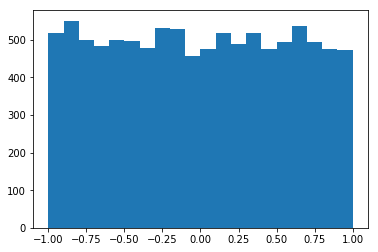

In [8]:
plt.hist(sorted(xmn), bins = 20)